# **Customer churn analysis**

Measure of how many customers leave the business.

This concept applies to any business where you have incoming loyal customers and all of a sudden the customer leaves the business

Deep-learning can help you with a great amount in measuring why customers are leaving.

Once we know why customers are leaving we can take appropriate business actions so that the customers don't leave the business.

In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [51]:
df = pd.read_csv('Churn.csv')

In [52]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
659,2085-JVGAD,Male,0,Yes,No,37,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.35,697.65,No
5639,6490-FGZAT,Male,0,No,No,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.65,109.3,No
902,2719-BDAQO,Male,0,No,No,17,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,93.85,1625.65,Yes
6785,3090-HAWSU,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),111.60,6876.05,Yes
5737,7989-VCQOH,Male,0,Yes,Yes,18,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,83.25,1611.15,No


In [53]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# **Exploratory Data Analysis**

In [54]:
df.drop('customerID',axis = 'columns',inplace = True)

In [55]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Here the total charges is an object

In [56]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Changing string type to float

In [57]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

There are some values which have a space between them

In [58]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [59]:
null_df = df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

Dropping the null rows out from the data frame

In [60]:
df.shape

(7043, 20)

In [61]:
df.iloc[null_df.index]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are just blank values for the total charges in the original dataset

In [62]:
df.shape

(7043, 20)

In [63]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [64]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-64-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [65]:
df1.TotalCharges.dtype

dtype('float64')

We will be looking at tenure to see how loyal the customer is

And see how many loyal customers are leaving

We will check the tenure of the customers who are not leaving

In [66]:
df1[df1.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [67]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

(array([[ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.],
        [ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

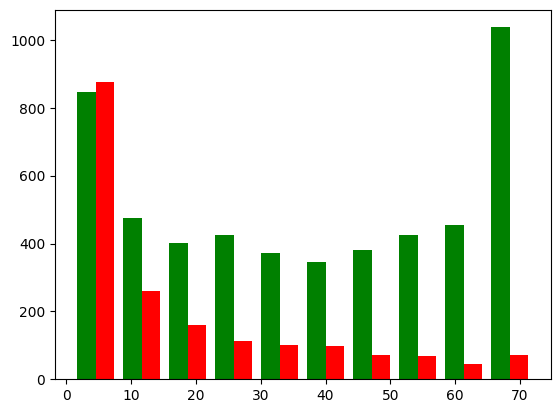

In [68]:
plt.hist([tenure_churn_no,tenure_churn_yes], color =['green','red'])

Green => The customer is staying

Red => The customer is leaving

# **Monthly Charge Comparision for customer churn**

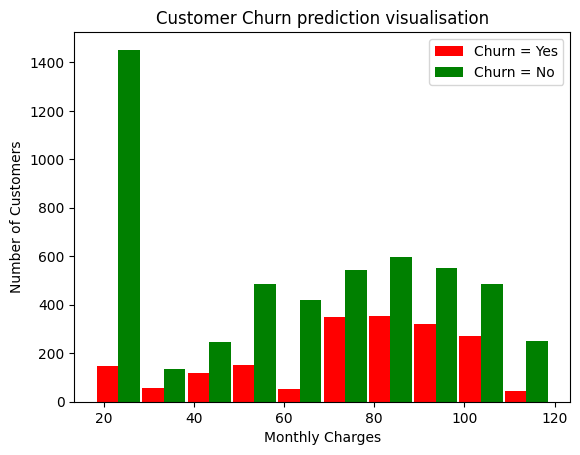

In [69]:
mc_churn_no = df1[df1.Churn=="No"].MonthlyCharges
mc_churn_yes = df1[df1.Churn=="Yes"].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn prediction visualisation")

plt.hist([mc_churn_yes,mc_churn_no], rwidth = 0.95, color = ['red','green'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

The monthly charges are very high for the people who churn compared to the people who don't churn

## **Label Encoding**

In [70]:
def print_unique_col_values(df):
  c = 1
  for col in df.columns:
    if df1[col].dtype == "object":
      print(c,col)
      print(df[col].unique())
      print('--------------------------------')
      c+=1

In [71]:
print_unique_col_values(df1)

1 gender
['Female' 'Male']
--------------------------------
2 Partner
['Yes' 'No']
--------------------------------
3 Dependents
['No' 'Yes']
--------------------------------
4 PhoneService
['No' 'Yes']
--------------------------------
5 MultipleLines
['No phone service' 'No' 'Yes']
--------------------------------
6 InternetService
['DSL' 'Fiber optic' 'No']
--------------------------------
7 OnlineSecurity
['No' 'Yes' 'No internet service']
--------------------------------
8 OnlineBackup
['Yes' 'No' 'No internet service']
--------------------------------
9 DeviceProtection
['No' 'Yes' 'No internet service']
--------------------------------
10 TechSupport
['No' 'Yes' 'No internet service']
--------------------------------
11 StreamingTV
['No' 'Yes' 'No internet service']
--------------------------------
12 StreamingMovies
['No' 'Yes' 'No internet service']
--------------------------------
13 Contract
['Month-to-month' 'One year' 'Two year']
--------------------------------
14 Paperles

Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [72]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-72-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-72-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [73]:
print_unique_col_values(df1)

1 gender
['Female' 'Male']
--------------------------------
2 Partner
['Yes' 'No']
--------------------------------
3 Dependents
['No' 'Yes']
--------------------------------
4 PhoneService
['No' 'Yes']
--------------------------------
5 MultipleLines
['No' 'Yes']
--------------------------------
6 InternetService
['DSL' 'Fiber optic' 'No']
--------------------------------
7 OnlineSecurity
['No' 'Yes']
--------------------------------
8 OnlineBackup
['Yes' 'No']
--------------------------------
9 DeviceProtection
['No' 'Yes']
--------------------------------
10 TechSupport
['No' 'Yes']
--------------------------------
11 StreamingTV
['No' 'Yes']
--------------------------------
12 StreamingMovies
['No' 'Yes']
--------------------------------
13 Contract
['Month-to-month' 'One year' 'Two year']
--------------------------------
14 PaperlessBilling
['Yes' 'No']
--------------------------------
15 PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

# **Convert Yes and No to 1 or 0**

In [74]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

<ipython-input-74-34dfac0bf179>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [75]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [76]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-76-ba153b6b6960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [77]:
df1.gender.unique()

array([1, 0])

One hot encoding for categorical columns

In [78]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [79]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4378,1,0,1,0,67,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2874,1,0,1,0,64,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
357,0,0,1,0,64,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5955,0,0,1,1,72,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
1917,1,1,1,0,72,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0


In [80]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [81]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [82]:
for col in df2:
  print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# **Train Test Split**

In [83]:
X = df2.drop('Churn', axis = 'columns') #All the columns excet y
y = df2['Churn']#Y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 7)

In [84]:
X_train.shape

(5625, 26)

In [85]:
X_test.shape

(1407, 26)

In [86]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3974,0,0,1,0,0.507042,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
5353,0,0,0,0,0.281690,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3527,0,0,1,0,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
738,0,1,0,0,0.577465,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
3474,0,1,1,1,0.901408,1,1,1,1,0,...,0,1,0,1,0,0,0,0,1,0
6548,0,0,1,1,0.422535,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3417,1,0,1,1,0.098592,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
6729,0,0,1,1,0.943662,1,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
4254,0,0,1,0,0.394366,1,1,1,1,0,...,0,1,0,1,0,0,0,0,1,0
3241,0,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [87]:
len(X_train.columns)

26

# **Build a model (ANN) in tensorflow/keras**

In [88]:
import tensorflow as tf
from tensorflow import keras

In [89]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid') #This is the input layer, I will have the same number of nodes as columns
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4854 - accuracy: 0.7497
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.7927
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8011
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8016
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8043
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8062
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8059
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8060
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8103
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4107 - accura

In [90]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7747


[0.4607849717140198, 0.7746979594230652]

In [91]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [92]:
y_pred

array([[0.06536365],
       [0.22101684],
       [0.63702613],
       ...,
       [0.30204275],
       [0.9785109 ],
       [0.01675281]], dtype=float32)

In [96]:
y__pred = []
for i in y_pred:
  if i>0.5:
    y__pred.append(1)
  else:
    y__pred.append(0)

In [97]:
y__pred

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,


In [93]:
y_test

2411    0
5118    0
5724    1
4774    0
1877    0
       ..
5810    1
7024    0
2225    0
2797    1
6842    0
Name: Churn, Length: 1407, dtype: int64

# **Performance of the model**

In [99]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y__pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1017
           1       0.60      0.56      0.58       390

    accuracy                           0.77      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

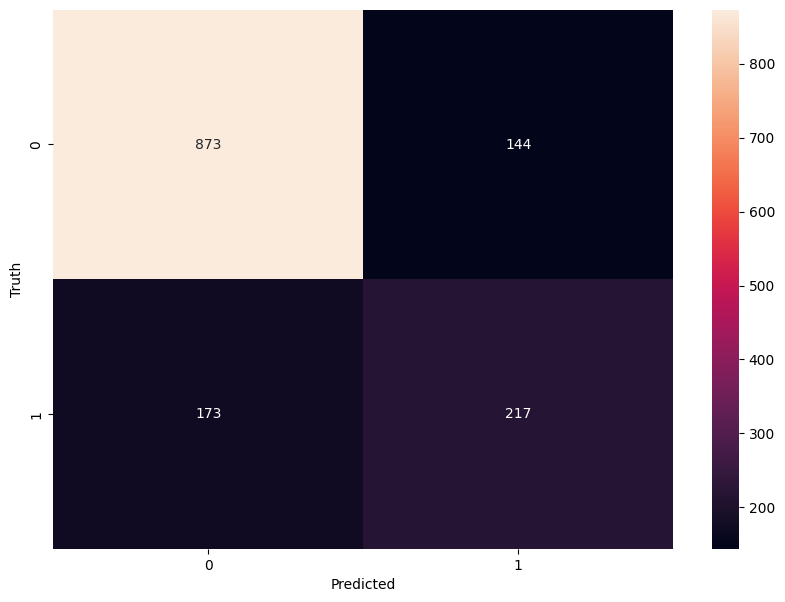

In [101]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y__pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Diagonals mean a correct prediction
#Off diagonals mean a wrong prediction

In [102]:
173+144 #These are the errors

317

In [103]:
873+217 #Correct predictions

1090

In [105]:
(873+217) / (317+1090) #This is the accuracy

0.7746979388770433

**Precision for 0 class**

In [110]:
print(873 / (873 + 173)*100,'%')

83.46080305927343 %


**Precision for 1 class**

In [109]:
print(217 / (217 + 144)*100,'%')

60.11080332409973 %
